__NetID:__ EJL242

# Unsupervised Learning

Previously, we have been focusing on supervised learning. Recall that we covered two types of supervised learning models: regression for predicting continuous variables and classification for predicting categorical ones.

For instance, for classification problems like a spam detector, you would feed the model training data with some data labeled as 'spam', and others as 'ham' (not spam). On the other hand, for regression problems like predicting housing prices, you would instead pass in some housing data including the associated house price. In both cases, the training data you feed into your model includes the desired solutions (i.e. spam/ham, house price). 

However, what if we are interested in something that isn't included as a target variable in the dataset? Then we need to rely on __unsupervised learning__ instead to gain insight into characteristics of the data that aren't explicity identified. 

__Note that there are many different types of unsupervised learning algorithms, each with different use cases. For example:__
 - Clustering
     - Hierarchical Cluster Analysis (HCA)
     - k-Means
     - Gaussian Mixture Models (GMMs)
     - Expected Maximization
 - Visualization and Dimensionality Reduction
     - Principal Component Analysis (PCA)
     - Kernel PCA
     - Locally Linear Embedding (LLE)
     - t-Distibuted Stochastic Linear Embedding (t-SNE)
 - Association Rule Learning
     - Apriori
     - Eclat

However, in this class, we shall only cover three of the clustering algorithms listed above: Hierarchical Clustering, k-Means Clustering, and Gaussian Mixture Models. Let's get started.

_(And as usual, if you are curious about anything data science that we mentioned, or that you've heard of outside of class, feel free to come talk to us about it after class or during office hours!)_

## Hierarchical Clustering

Hierarchical clustering groups observations into multiple levels of sets; the top-level set includes all of the data, and the bottom-level sets contain individual observations. The levels in between contain sets of observations with similar features. Let's take a look at a dataset. 

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


The iris dataset contains observations on three iris species. Features include sepal length, sepal width, petal length, and petal width. Notice how the species is not identified in the version of the dataset that we use above. Let's see if we can gain this information through hierarchical clustering. 

### Question 1

Perform hierarchical clustering on the iris dataset and plot the resulting clusters (as a dendrogram). How many clusters do you see? How does this compare to the number of clusters you expect to see?

In [3]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

iris = StandardScaler().fit_transform(iris)

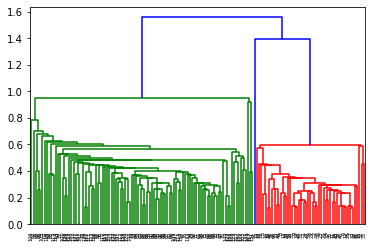

In [4]:
# solution 
hclust = linkage(iris)
dendrogram(hclust)
plt.show()

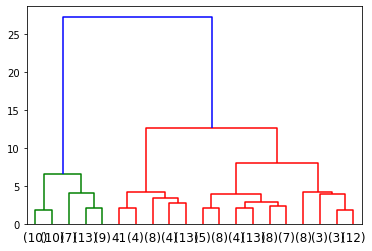

In [5]:
# solution
hclust = linkage(iris, method='ward')
dendrogram(hclust, truncate_mode='lastp', p=20)
plt.show()

#### A side note about distances:
To find the "similarity" for a group of clusters, we simply measure the magnitude of the vector between two the two data points (in whatever dimension we are working with). There are many ways to calculate the magnitude of this vector: for instance, in class we gave the example of either using the euclidean distance or the manhattan distance.

## K-Means Clustering

K-means clustering is another technique for finding groupings in a dataset. Recall kNN from a few lectures ago; k-means uses a similar geometric approach. The k-means algorithm takes in the number of clusters (k), computes the centroid of each cluster, and assigns observations to clusters based on distance from the centroid. Let's take another look at the iris dataset. 

In [6]:
data = datasets.load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris_target = pd.DataFrame(data.target, columns=['Species'])
iris_with_target = pd.concat([iris, iris_target], axis=1)

iris = iris.drop('sepal length (cm)', axis=1)
iris = iris.drop('sepal width (cm)', axis=1)
iris_with_target = iris_with_target.drop('sepal length (cm)', axis=1)
iris_with_target = iris_with_target.drop('sepal width (cm)', axis=1)

iris_with_target.head()

,petal length (cm),petal width (cm),Species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


We've added species identification back into the dataset for the purpose of viewing the groupings in the data. We also drop sepal length and sepal width so that we can plot the observations on a 2d graph. 

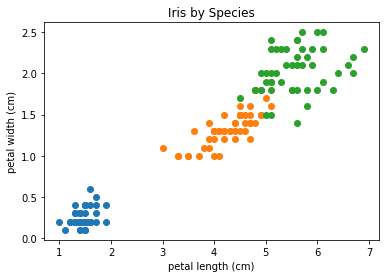

In [7]:
k = len(iris_with_target['Species'].unique())
for i in iris_with_target['Species'].unique():
    # select only the applicable rows
    ds = iris_with_target[iris_with_target['Species'] == i]
    # plot the points
    plt.plot(ds[['petal length (cm)']],ds[['petal width (cm)']],'o')
plt.title("Iris by Species")
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

We can clearly see the three groupings in the data corresponding to the three species. Let's see if we can replicate these clusters using the k-means algorithm. 

### Question 2

Perform k-means clustering on the iris dataset (using only the petal length and petal width features). We have already dropped the other features for you; you should use the dataframe named 'iris' initialized above.

In [8]:
from sklearn import cluster

In [9]:
# solution 
kmeans =cluster.KMeans(n_clusters = 3, random_state=1).fit(iris)

To test your code, let's plot your results and compare them to the actual groupings found above. 

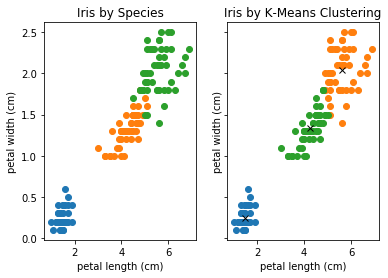

In [10]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

_, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# original graph
for i in iris_with_target['Species'].unique():
    # select only the applicable rows
    ds = iris_with_target[iris_with_target['Species'] == i]
    # plot the points
    ax1.plot(ds[['petal length (cm)']],ds[['petal width (cm)']],'o')
ax1.set_title("Iris by Species")
ax1.set_xlabel('petal length (cm)')
ax1.set_ylabel('petal width (cm)')

# kmeans graph
for i in range(k):
    # select only data observations from the applicable cluster
    ds = iris.iloc[np.where(labels==i)]
    # plot the data observations
    ax2.plot(ds['petal length (cm)'],ds['petal width (cm)'],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
ax2.set_title("Iris by K-Means Clustering")
ax2.set_xlabel('petal length (cm)')
ax2.set_ylabel('petal width (cm)')

plt.show()

## GMMs

The k-means algorithm we just covered have a major flaw - they do not account for variance. You perhaps can recall from your stats class that the variance, visually, is related to the width of a bell shaped curve. Extending on this visual, you can imagine the variance in two-dimensions to just be the radius of a sphere.

Whenever we perform k-means clustering on a model, it groups the data into clusters of circles (in 2 dimension, and hyper-spheres in higher dimensions). This works fine if your data is circular, but performs badly when it is in any shape otherwise. Here is a good visual example: https://towardsdatascience.com/gaussian-mixture-models-d13a5e915c8e.

In such cases, we turn to GMMs. GMMs also have an added advantage of not giving hard assignments into clusters (which k-means does), rather giving 'soft assignments', where each data point can be generated by any of the distributions with corresponding probability.

This concept may seem rather abstract right now - let's see it visually!

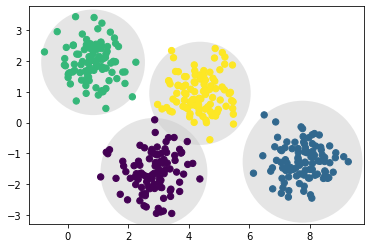

In [11]:
from sklearn.datasets.samples_generator import make_blobs
from scipy.spatial.distance import cdist

X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1] # reversing the axis for better display

model = cluster.KMeans(4, random_state=0)
model.fit(X)
predictions = model.predict(X)

ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=predictions, s=40, cmap='viridis', zorder=2)
centers = model.cluster_centers_
radii = [cdist(X[predictions == i], [center]).max()
         for i, center in enumerate(centers)]
for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

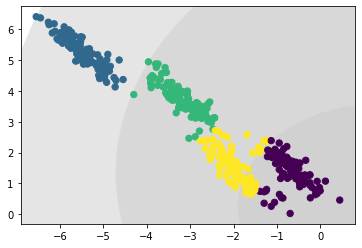

In [24]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

model = cluster.KMeans(n_clusters=4, random_state=0)
model.fit(X_stretched)
predictions = model.predict(X_stretched)

ax = plt.gca()
ax.scatter(X_stretched[:, 0], X_stretched[:, 1], c=predictions, s=40, cmap='viridis', zorder=2)
centers = kmeans.cluster_centers_
radii = [cdist(X_stretched[predictions == i], [center]).max()
         for i, center in enumerate(centers)]
for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

As you can see, a K-Means model generally performs quite poorly when fitting any non-circular shapes. Let's see how a GMM performs instead:

### Question 3

In [33]:
# solutions 
from sklearn import mixture

GaussMM = mixture.GaussianMixture(n_components=4,random_state=42)

We can see the GMMs' performance more clearly with the drawn boundaries below:

In [29]:
# you can use these functions
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(model, X, ax=None):
    
    ax = ax or plt.gca()
    model.fit(X)
    predictions = model.predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=predictions, s=40, cmap='viridis', zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / model.weights_.max()
    for pos, covar, w in zip(model.means_, model.covariances_, model.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

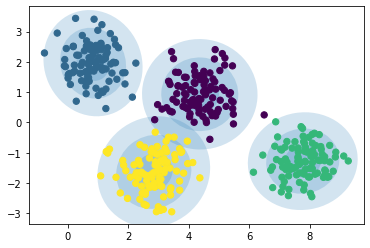

In [34]:
# solutions
plot_gmm(GaussMM, X)

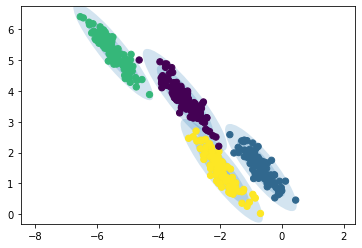

In [35]:
# solutions
plot_gmm(GaussMM, X_stretched)

## PCA (Optional)

We use principal component analysis to determine which features contribute most significantly to variation in a dataset. Let's do an example on HR analytics data. If you're interested, you can read about the dataset [here](https://www.kaggle.com/giripujar/hr-analytics).

In [18]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

hr_data = pd.read_csv('lecture9data.csv')

hr_data = hr_data.drop('left', axis=1)
hr_data = hr_data.drop('Department', axis=1)
hr_data = hr_data.drop('salary', axis=1)

hr_data = pd.DataFrame(preprocessing.scale(hr_data),columns = hr_data.columns)
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412


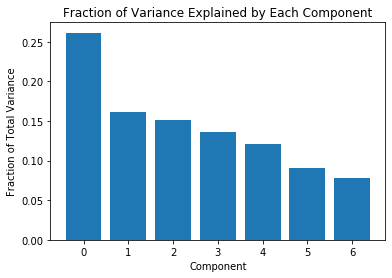

In [19]:
# perform PCA
pca = PCA().fit(hr_data)

# plot fraction of variance explained by each component
x = np.arange(7)
plt.bar(x, pca.explained_variance_ratio_)
plt.title('Fraction of Variance Explained by Each Component')
plt.xlabel('Component')
plt.ylabel('Fraction of Total Variance')
plt.show()

Now we need to determine the relationship between components and features. It's important to understand that a component does not correspond to a single feature; a component may be related to multiple features. 

In [19]:
components = pd.DataFrame(pca.components_, columns=hr_data.columns)
components

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,-0.087977,0.506957,0.578835,0.549017,0.313549,-0.019302,0.009969
1,0.797525,0.331809,-0.103380,0.103890,-0.284045,0.374899,0.105573
2,-0.094390,-0.134995,-0.022935,-0.107150,0.425479,0.452452,0.758363
3,0.267869,0.110150,-0.103362,-0.010349,0.040369,-0.804839,0.505892
4,0.336371,0.073935,-0.196776,-0.251710,0.787822,-0.057630,-0.394112
5,-0.277849,0.707810,0.006571,-0.634973,-0.122001,0.036229,0.048730
6,0.291899,-0.309966,0.777360,-0.457877,-0.052872,-0.044331,-0.003917


Each number is the correlation between the feature and the component. For example, we can see that the feature which is most strongly correlated with component 1 is satisfaction_level. 

### Question 4 (Advanced - Optional)

Based on the results of the principal component analysis above, which features would you expect are most important to include in a predictive model? Why?

Answer Here:

### Further Readings:

Actually, there are four major categories of machine learning systems: supervised learning, unsupervised learning, semisupervised learning, and reinforcement learning. Semisupervised learning, as you can guess, involved models that take in __partially labeled data__ (usually a lot of unlabeled data and just a little labeled data), while reinforcement learning covers goal-oriented algorithms that repeatedly learn and master a particular (usuallly complex task). Reinforcement learning is often the basis of many "AI learns to play..." youtube and facebook videos.

_Side note, you can watch people use reinforcement learning to beat games_ [_here_](https://www.youtube.com/watch?v=L4KBBAwF_bE) _(super cool) and_ [_here_](https://www.youtube.com/watch?v=MasxAN-xZIU) _(a less successful - but no less cool - attempt)_

To get an overview of these different categories, we highly recommend you read the very first chapter of this book: [__Hands-On Machine Learning with Scikit-Learn & Tensorflow__](http://index-of.es/Varios-2/Hands%20on%20Machine%20Learning%20with%20Scikit%20Learn%20and%20Tensorflow.pdf) (and continue reading if you want to learn how to implement them in Python). In fact, if you go through the book, some of the concepts should seem familiar to you, as we covered them either briefly or somewhat in depth throughout the semester. Indeed, be proud of yourself: you already have the basic concepts of machine learning and data science more or less nailed down!

____